## Import libraries and dataset

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import articles
df_art = pd.read_parquet("../data/articles.parquet")

In [4]:
# import customers
df_cust = pd.read_parquet("../data/customers.parquet")

In [5]:
# import transactions
df_tran = pd.read_parquet("../data/transactions_train.parquet")

In [6]:
df_art.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,12855,253,9,0,1010016,0,9,0,...,10,0,0,1,0,16,30,1002,2,8834
1,108775044,108775,12855,253,9,0,1010016,0,10,2,...,10,0,0,1,0,16,30,1002,2,8834
2,108775051,108775,44846,253,9,0,1010017,3,11,11,...,10,0,0,1,0,16,30,1002,2,8834
3,110065001,110065,8159,306,13,4,1010016,0,9,0,...,131,7,7,1,0,61,5,1017,4,8243
4,110065002,110065,8159,306,13,4,1010016,0,10,2,...,131,7,7,1,0,61,5,1017,4,8243


In [7]:
df_cust.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,6883939031699146327,-1,-1,0,0,49,6305
1,11246327431398957306,-1,-1,0,0,25,33726
2,18439897732908966680,-1,-1,0,0,24,3247
3,18352672461570950206,-1,-1,0,0,54,168643
4,18162778555210377306,1,1,0,1,52,168645


In [8]:
df_tran.head()

,t_dat,customer_id,article_id,price,sales_channel_id,week
25784,2018-09-20,1728846800780188,519773001,0.028458,2,0
25785,2018-09-20,1728846800780188,578472001,0.032525,2,0
5389,2018-09-20,2076973761519164,661795002,0.167797,2,0
5390,2018-09-20,2076973761519164,684080003,0.101678,2,0
47429,2018-09-20,2918879973994241,662980001,0.033881,1,0


## Features engineering CUSTOMERS

### Has kids

I'm going to add a column has_kids with 1 for those who bought baby articles and 0 for the rest

In [9]:
df_art["index_group_name"].value_counts()

0    39737
1    34711
2    15149
3    12553
4     3392
Name: index_group_name, dtype: int64

In [10]:
# df_art["index_group_name"] == Baby/Children 

In [11]:
baby_articles = df_art[df_art['index_group_name'] == 1]

baby_article_ids = baby_articles['article_id'].tolist()

len(baby_article_ids)

34711

In [12]:
transazioni_baby = df_tran[df_tran['article_id'].isin(baby_article_ids)]

customer_ids = transazioni_baby['customer_id'].unique()

len(customer_ids)

225761

In [13]:
df_cust['has_kids'] = 0

df_cust.loc[df_cust['customer_id'].isin(customer_ids), 'has_kids'] = 1

### FN, Active, fn_freq

In [14]:
# drop FN and Active
df_cust = df_cust.drop(["FN", "Active"], axis=1)

In [15]:
df_cust.isna().any()

customer_id               False
club_member_status        False
fashion_news_frequency    False
age                       False
postal_code               False
has_kids                  False
dtype: bool

## Work on  graphical appearence +  color group

In [16]:
df_art["colour_group_name"].value_counts()
# 0 is black
# 2 is white
# 4 is grey

0     22670
1     12171
2      9542
3      5811
4      4487
5      3356
6      3308
7      3056
8      3012
9      2767
10     2731
11     2726
12     2712
13     2340
14     2106
15     2105
16     2063
17     1645
18     1520
19     1471
20     1377
21     1084
22     1027
23      984
24      886
25      818
26      815
27      779
28      750
29      709
30      681
31      574
32      553
33      473
34      435
35      315
36      285
37      226
38      225
39      182
40      153
41      129
42      114
43      105
44       94
45       51
46       46
47       31
48       28
49       14
Name: colour_group_name, dtype: int64

In [17]:
df_art["graphical_appearance_name"].value_counts()
# 0 is solid

0     49747
1     17165
2      5938
3      4990
4      4842
5      3215
6      3098
7      2178
8      1830
9      1513
10     1502
11     1341
12     1165
13     1132
14      958
15      830
16      806
17      681
18      586
19      515
20      376
21      346
22      322
23      153
24       86
25       86
26       66
27       52
28       15
29        8
Name: graphical_appearance_name, dtype: int64

In [18]:
#create a list of articles that have neutral color
just_neutral = df_art[(df_art['colour_group_name'] == 2) | (df_art['colour_group_name'] == 2) | (df_art['colour_group_name'] == 4)]
just_neutral_ids = just_neutral['article_id'].tolist()
len(just_neutral_ids)

14029

In [19]:
just_solid = df_art[df_art['graphical_appearance_name'] == 0]
just_solid_ids = just_solid['article_id'].tolist()
len(just_solid_ids)

49747

In [20]:
# find transactions of non neutral articles
transazioni_not_neutral= df_tran[~df_tran['article_id'].isin(just_neutral_ids)]
#find related customers
customer_not_neutral = transazioni_not_neutral['customer_id'].unique()
len(customer_not_neutral)

1339256

In [21]:
# find transactions of non solid articles
transazioni_not_solid= df_tran[~df_tran['article_id'].isin(just_solid_ids)]
#find the related customers
customer_not_solid = transazioni_not_solid['customer_id'].unique()
len(customer_not_solid)

1171395

In [22]:
#create a new column with 1 for people who also bought colorful and not solid clothes
df_cust['not_solid_neutral'] = 0
df_cust.loc[(df_cust['customer_id'].isin(customer_not_neutral)) & (df_cust['customer_id'].isin(customer_not_solid)), 'not_solid_neutral'] = 1

### Group age

In [23]:
df_cust['age_group'] = 0
df_cust.loc[(df_cust['age'] >= 15) & (df_cust['age'] <= 30), 'age_group'] = 0
df_cust.loc[(df_cust['age'] > 30) & (df_cust['age'] <= 50), 'age_group'] = 1
df_cust.loc[(df_cust['age'] > 50) & (df_cust['age'] <= 100), 'age_group'] = 2

0.008087516717638115


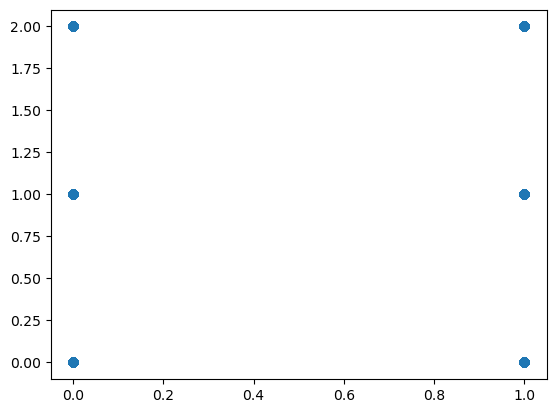

In [24]:
correlation = df_cust['not_solid_neutral'].corr(df_cust['age_group'])
print(correlation)
plt.scatter(df_cust['not_solid_neutral'], df_cust['age_group'])
plt.show()

0.08272341469109795


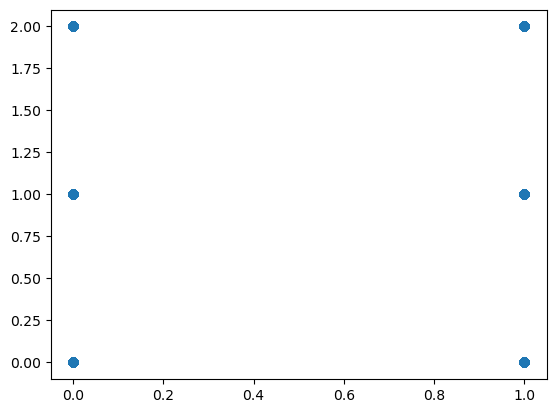

In [25]:
correlation = df_cust['has_kids'].corr(df_cust['age_group'])
print(correlation)
plt.scatter(df_cust['has_kids'], df_cust['age_group'])
plt.show()

### Articles that were never purchased

In [26]:
id_tutti = df_art["article_id"].unique().tolist()

In [27]:
id_comprati = df_tran["article_id"].unique().tolist()

In [28]:
non_comprati = []
for id in id_tutti:
    if id not in id_comprati:
        non_comprati.append(id)

print(len(non_comprati))


995


### Export new costumers

In [29]:
folder = "../generated_data/"
df_cust.to_parquet(folder + "FE_customers.parquet")

In [30]:
df_cust

,customer_id,club_member_status,fashion_news_frequency,age,postal_code,has_kids,not_solid_neutral,age_group
0,6883939031699146327,0,0,49,6305,1,1,1
1,11246327431398957306,0,0,25,33726,1,1,0
2,18439897732908966680,0,0,24,3247,0,1,0
3,18352672461570950206,0,0,54,168643,0,0,2
4,18162778555210377306,0,1,52,168645,0,1,2
...,...,...,...,...,...,...,...,...
1371975,7551062398649767985,0,0,24,50351,0,1,0
1371976,9305341941720086711,0,0,21,80169,1,1,0
1371977,10160427316885688932,0,1,21,106737,0,1,0
1371978,2551401172826382186,0,1,18,111894,0,1,0
